In [4]:
from time import time
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [5]:
os.chdir("./drive/MyDrive/data")


In [6]:
CATEGORIES=os.listdir(path="./train")
DATADIR="./train"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from tqdm import tqdm

In [58]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
      i=0
      path=os.path.join(DATADIR, category)
      class_num=CATEGORIES.index(category)
      for img in os.listdir(path):
        i=i+1
        try:
          img_array=cv2.imread(os.path.join(path,img))
          #new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([img_array[:,:,1],class_num])
        except Exception as e:
          pass
        if i==1000:
          break  
create_training_data()            

In [68]:
train_length = len(training_data)
train_length

5662

In [69]:
X_train=[]
y_train=[]

for categories, label in training_data:
    X_train.append(categories)
    y_train.append(label)
X_train= np.array(X_train).reshape(train_length,-1)

In [70]:
validation_data=[]
DATADIR="./validation"
def create_validation_data():
    for category in CATEGORIES:
        i=0
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            i=i+1
            try:
                img_array=cv2.imread(os.path.join(path,img))
                #new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                validation_data.append([img_array[:,:,1],class_num])
            except Exception as e:
                pass
            if i==40:
              break
create_validation_data()            

In [71]:
val_length = len(validation_data)
val_length

280

In [72]:
X_val=[]
y_val=[]

for categories, label in validation_data:
    X_val.append(categories)
    y_val.append(label)
X_val= np.array(X_val).reshape(val_length,-1)

In [73]:
test_data=[]
DATADIR="./test"
def create_test_data():
    for category in CATEGORIES:
        i=0
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            i=i+1
            try:
                img_array=cv2.imread(os.path.join(path,img))
                #new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([img_array[:,:,1],class_num])
            except Exception as e:
                pass
            if i==30:
              break    
create_test_data()            

In [74]:
test_length = len(test_data)
test_length

210

In [75]:
X_test=[]
y_test=[]

for categories, label in test_data:
    X_test.append(categories)
    y_test.append(label)
X_test= np.array(X_test).reshape(test_length,-1)

In [76]:
X_test=[]
y_test=[]

for categories, label in test_data:
    X_test.append(categories)
    y_test.append(label)
X_test= np.array(X_test).reshape(test_length,-1)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
lda=LinearDiscriminantAnalysis(n_components=6)
lda.fit(X_train,y_train)
X_train_lda=lda.transform(X_train)
X_val_lda=lda.transform(X_val)
X_test_lda=lda.transform(X_test)

In [79]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e2, 1e3),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=20
)
clf = clf.fit(X_train_lda, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 106.938s
Best estimator found by grid search:
SVC(C=758.9241633444675, class_weight='balanced', gamma=0.0001255895663834938)


Predicting people's names on the test set
done in 0.052s
              precision    recall  f1-score   support

       angry       0.74      0.85      0.79        40
    surprise       0.95      0.88      0.91        40
        fear       0.79      0.75      0.77        40
       happy       0.85      0.82      0.84        40
     disgust       0.98      1.00      0.99        40
     neutral       0.73      0.80      0.76        40
         sad       0.86      0.75      0.80        40

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280



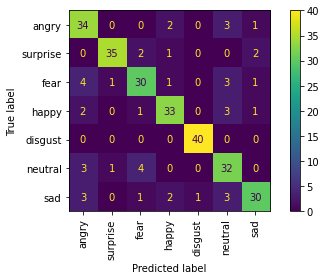

In [80]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_val_lda)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_val, y_pred, target_names=CATEGORIES))
ConfusionMatrixDisplay.from_estimator(
    clf, X_val_lda, y_val, display_labels=CATEGORIES, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()